### **_Finding the relative consevation % of S gene and NSP3  of Orf1Ab region in SARS-CoV2_**

1. Data Acquisition  

2. Data cleaning  

3. Data Analysis  

4. Data visulization  

# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _  _


 # <font color=green> Step 1: Data Acquisition </font>

#### Dataset was obtained from [NCBI Virus](https://www.ncbi.nlm.nih.gov/labs/virus/vssi/#/virus?SeqType_s=Nucleotide&VirusLineage_ss=Severe%20acute%20respiratory%20syndrome%20coronavirus%202%20(SARS-CoV-2),%20taxid:2697049&Completeness_s=complete&Country_s=Egypt)

* filtered by:
    * Nucleotide compltetness: complete
    * Geographical Region: Egypt

**_Download CSV file that contains the genomes info from NCBI Virus_**

In [4]:
import pandas as pd

In [10]:
seq_df= pd.read_csv("/content/sequences.csv")
seq_df.head(1)

,Accession,Organism_Name,Submitters,Organization,Org_location,Release_Date,Pangolin,PangoVersions,Random_Sampling,Isolate,Species,Molecule_type,Length,Geo_Location,Isolation_Source,Collection_Date
0,OP183416.1,Severe acute respiratory syndrome coronavirus 2,"Gad,A.F., Seadawy,M.G., Hanaa,H.A., Mervet,G.H...","Egypt Army, Main Laboratories Of chemical warfare",Egypt,2022-08-09T00:00:00Z,BA.2,4.3/1.20/v0.1.10/0.3.18,NaN,OMICRON-1,Severe acute respiratory syndrome-related coro...,ssRNA(+),29876,Egypt,oronasopharynx,2022-05-13


In [11]:
accession = [*seq_df['Accession']]
len(accession)

10

**_Download the genomes sequances from NCBI database using biopython ENTREZ package_**

In [12]:
!pip install biopython
from Bio import Entrez

In [14]:
#Download ref seq

Entrez.email = 'Mariamali.bioinform@gmail.com'
refseq_handle = open('/content/ref_seq.gb','w')
handle = Entrez.efetch(db='nuccore',id='NC_045512',rettype='gb',retmode='text')
record = handle.read()
refseq_handle.write(record)
refseq_handle.close()

In [15]:
#Download all of our sequences from the accession list
Entrez.email = 'mariamali.bioinform@gmail.com'
epost_handle = Entrez.epost(db='nuccore',id=",".join(accession))

In [16]:
search_results = Entrez.read(epost_handle)
search_results

{'QueryKey': '1', 'WebEnv': 'MCID_64d650ad5a11b01b9c122ab7'}

In [17]:
webenv = search_results['WebEnv']
Query_key = search_results['QueryKey']

In [19]:
batch_size = 5
out_handle = open('/content/SARS_CoV-2.gb','w')
count= len(accession)

for start in range(0,count,batch_size):
    end = min(count,start +batch_size)
    print('Downloading records %i to %i' %(start +1,end)+"...")
    efetch_handle = Entrez.efetch(
        db='nuccore',
        rettype= 'gb',
        retmode='text',
        retstart = start,
        retmax = batch_size,
        webenv = webenv,
        query_key = Query_key)
    records = efetch_handle.read()
    efetch_handle.close()
    out_handle.write(records)
out_handle.close()
print('all done!')

all done!


 # <font color=green> Step 2: cleaning Data </font>

In [20]:
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord

In [22]:
CoV_seq = SeqIO.parse('/content/SARS_CoV-2.gb', "genbank")
CoV_seq

In [23]:
count = 0
for record in CoV_seq:
    count += 1
count

10

In [25]:
ref_seq = SeqIO.read('/content/ref_seq.gb','genbank')
ref_seq

SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='NC_045512.2', name='NC_045512', description='Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=['BioProject:PRJNA485481'])

In [26]:
#use the ref seq to search for the s gene
features = ref_seq.features

features_genes = [feature for feature in features if feature.type == 'gene']

features_genes

[SeqFeature(SimpleLocation(ExactPosition(265), ExactPosition(21555), strand=1), type='gene', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(21562), ExactPosition(25384), strand=1), type='gene', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(25392), ExactPosition(26220), strand=1), type='gene', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(26244), ExactPosition(26472), strand=1), type='gene', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(26522), ExactPosition(27191), strand=1), type='gene', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(27201), ExactPosition(27387), strand=1), type='gene', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(27393), ExactPosition(27759), strand=1), type='gene', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(27755), ExactPosition(27887), strand=1), type='gene', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(27893), ExactPosition(28259), strand=1), type='gene', qualifiers=

In [27]:
for feature in features_genes:
    print(feature.qualifiers['gene'])

['ORF1ab']
['S']
['ORF3a']
['E']
['M']
['ORF6']
['ORF7a']
['ORF7b']
['ORF8']
['N']
['ORF10']


In [28]:
#get some info on that gene
for gene_feature in features_genes:
    if gene_feature.qualifiers['gene'] == ['S']:
        print(gene_feature)
        print('The S gene is ' + str(len(gene_feature)) + " bases long")

type: gene
location: [21562:25384](+)
qualifiers:
    Key: db_xref, Value: ['GeneID:43740568']
    Key: gene, Value: ['S']
    Key: gene_synonym, Value: ['spike glycoprotein']
    Key: locus_tag, Value: ['GU280_gp02']

The S gene is 3822 bases long


In [29]:
for gene_feature in features_genes:
    if gene_feature.qualifiers['gene'] == ['N']:
        print(gene_feature)
        print('The N gene is ' + str(len(gene_feature)) + " bases long")

type: gene
location: [28273:29533](+)
qualifiers:
    Key: db_xref, Value: ['GeneID:43740575']
    Key: gene, Value: ['N']
    Key: locus_tag, Value: ['GU280_gp10']

The N gene is 1260 bases long


In [30]:
#get some info on that gene
for gene_feature in features_genes:
    if gene_feature.qualifiers['gene'] == ['ORF1ab']:
        print(gene_feature)
        print('The ORF gene is ' + str(len(gene_feature)) + " bases long")

type: gene
location: [265:21555](+)
qualifiers:
    Key: db_xref, Value: ['GeneID:43740578']
    Key: gene, Value: ['ORF1ab']
    Key: locus_tag, Value: ['GU280_gp01']

The ORF gene is 21290 bases long


In [31]:
for gene_feature in features_genes:
    if gene_feature.qualifiers['gene'] == ['M']:
        print(gene_feature)
        print('The M gene is ' + str(len(gene_feature)) + " bases long")

type: gene
location: [26522:27191](+)
qualifiers:
    Key: db_xref, Value: ['GeneID:43740571']
    Key: gene, Value: ['M']
    Key: locus_tag, Value: ['GU280_gp05']

The M gene is 669 bases long


In [32]:
for gene_feature in features_genes:
    if gene_feature.qualifiers['gene'] == ['E']:
        print(gene_feature)
        print('The E gene is ' + str(len(gene_feature)) + " bases long")

type: gene
location: [26244:26472](+)
qualifiers:
    Key: db_xref, Value: ['GeneID:43740570']
    Key: gene, Value: ['E']
    Key: locus_tag, Value: ['GU280_gp04']

The E gene is 228 bases long


In [35]:
#SAVE s gene from all the sequenses
s_seqs = []
CoV_seq = SeqIO.parse('/content/SARS_CoV-2.gb', 'genbank')

for record in CoV_seq:
    for feature in record.features:
        if feature.type == 'gene' and feature.qualifiers['gene']==['S']:
            new_rec = SeqRecord(seq=feature.extract(record.seq),id=record.id)
            s_seqs.append(new_rec)


In [36]:
N_seqs = []
CoV_seq = SeqIO.parse('/content/SARS_CoV-2.gb', 'genbank')

for record in CoV_seq:
    for feature in record.features:
        if feature.type == 'gene' and feature.qualifiers['gene']==['N']:
            new_rec = SeqRecord(seq=feature.extract(record.seq),id=record.id)
            N_seqs.append(new_rec)

In [37]:
M_seqs = []
CoV_seq = SeqIO.parse('/content/SARS_CoV-2.gb', 'genbank')

for record in CoV_seq:
    for feature in record.features:
        if feature.type == 'gene' and feature.qualifiers['gene']==['M']:
            new_rec = SeqRecord(seq=feature.extract(record.seq),id=record.id)
            M_seqs.append(new_rec)

In [38]:
E_seqs = []
CoV_seq = SeqIO.parse('/content/SARS_CoV-2.gb', 'genbank')

for record in CoV_seq:
    for feature in record.features:
        if feature.type == 'gene' and feature.qualifiers['gene']==['E']:
            new_rec = SeqRecord(seq=feature.extract(record.seq),id=record.id)
            E_seqs.append(new_rec)

In [39]:
SeqIO.write(s_seqs, '/content/s_oro.fasta', 'fasta')

10

In [41]:
SeqIO.write(N_seqs, '/content/N_oro.fasta', 'fasta')

10

In [42]:
SeqIO.write(M_seqs, '/content/M_oro.fasta', 'fasta')

10

In [43]:
SeqIO.write(E_seqs, '/content/E_oro.fasta', 'fasta')

10

 # <font color=green> Step 3: Analysis </font>

In [48]:
s_oro = AlignIO.read('/content/s_oro_aligned.clustal_num', 'clustal')
s_oro_summary_align = AlignInfo.SummaryInfo(s_oro)

In [49]:
s_oro_summary_align.dumb_consensus()

Seq('ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTGTTAATCTT...TAA')

In [52]:
!pip install scikit-bio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 11.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.7 MB/s eta 0:00:00
  Created wheel for scikit-bio: filename=scikit_bio-0.5.9-cp310-cp310-linux_x86_64.whl size=2469060 sha256=6f3bc75769d3174b309c28fb8134c2061a865c63ed71d315087cfa7a7697b22a
  Stored in directory: /root/.cache/pip/wheels/77/72/2c/993efbb4d69a86bee422bc96e4e2f1ec9af7cc596a08bb86e1
  Created wheel for hdmedians: filename=hdmedians-0.14.2-cp310-cp310-linux_x86_64.whl size=678991 sha256=81c88299a350ca14f172f747771ae9e879103fa9c7548cc21b3c05da170f4a35
  Stored in directory: /root/.cache/pip/wheels/82/8f/0d/0c61130cfad119482ebb95ae

In [53]:
#using skbio to calculate the estimate of comservation
from skbio import DNA, TabularMSA

In [55]:
S_oro_align = AlignIO.convert('s_oro_aligned.clustal_num','clustal', 's_oro_aligned.fasta','fasta')
N_oro_align = AlignIO.convert('n_oro_aligned.clustal_num','clustal', 'N_oro_aligned.fasta','fasta')
ORF1ab_oro_align = AlignIO.convert('ORF1ab_oro_aligned.clustal_num','clustal', 'orf1ab_oro_aligned.fasta','fasta')
M_oro_align = AlignIO.convert('M_oro_aligned.clustal_num','clustal', 'M_oro_aligned.fasta','fasta')
E_oro_align = AlignIO.convert('E_oro_aligned.clustal_num','clustal', 'E_oro_aligned.fasta','fasta')
rdrp_oro_align = AlignIO.convert('rdrp_oro_aligned.clustal_num','clustal', 'rdrp_oro_aligned.fasta','fasta')

In [56]:
S_oro_align_MSA = TabularMSA.read('s_oro_aligned.fasta',format='fasta', constructor=DNA)
S_oro_align_MSA.reassign_index(minter='id')
S_oro_align_MSA

TabularMSA[DNA]
-----------------------------------------------------------------------
Stats:
    sequence count: 11
    position count: 3822
-----------------------------------------------------------------------
ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTC ... GTGCTCAAAGGAGTCAAATTACATTACACATAA
ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTC ... GTGCTCAAAGGAGTCAAATTACATTACACATAA
...
ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTC ... GTGCTCAAAGGAGTCAAATTACATTACACATAA
ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTC ... GTGCTCAAAGGAGTCAAATTACATTACACATAA

In [57]:
N_oro_align_MSA = TabularMSA.read('N_oro_aligned.fasta',format='fasta', constructor=DNA)
N_oro_align_MSA.reassign_index(minter='id')
N_oro_align_MSA

TabularMSA[DNA]
-----------------------------------------------------------------------
Stats:
    sequence count: 11
    position count: 1260
-----------------------------------------------------------------------
ATGTCTGATAATGGACCCCAAAATCAGCGAAAT ... TCCATGAGCAGTGCTGACTCAACTCAGGCCTAA
ATGTCTGATAATGGACCCCAAAATCAGCGAAAT ... TCCATGAGCAGTGCTGACTCAACTCAGGCCTAA
...
ATGTCTGATAATGGACCCCAAAATCAGCGAAAT ... TCCATGAGCAGTGCTGACTCAACTCAGGCCTAA
ATGTCTGATAATGGACCCCAAAATCAGCGAAAT ... TCCATGAGCAGTGCTGACTCAACTCAGGCCTAA

In [58]:
M_oro_align_MSA = TabularMSA.read('M_oro_aligned.fasta',format='fasta', constructor=DNA)
M_oro_align_MSA.reassign_index(minter='id')
M_oro_align_MSA

TabularMSA[DNA]
-----------------------------------------------------------------------
Stats:
    sequence count: 11
    position count: 669
-----------------------------------------------------------------------
ATGGCAAATTCCAACGGTACTATTACCGTTGAA ... AGCAGTGACAATATTGCTTTGCTTGTACAGTAA
ATGGCAGATTCCAACGGTACTATTACCGTTGAA ... AGCAGTGACAATATTGCTTTGCTTGTACAGTAA
...
ATGGCAGATTCCAACGGTACTATTACCGTTGAA ... AGCAGTGACAATATTGCTTTGCTTGTACAGTAA
ATGGCAGATTCCAACGGTACTATTACCGTTGAA ... AGCAGTGACAATATTGCTTTGCTTGTACAGTAA

In [65]:
E_oro_align_MSA = TabularMSA.read('E_oro_aligned.fasta',format='fasta', constructor=DNA)
E_oro_align_MSA.reassign_index(minter='id')
E_oro_align_MSA

TabularMSA[DNA]
-----------------------------------------------------------------------
Stats:
    sequence count: 11
    position count: 228
-----------------------------------------------------------------------
ATGTACTCATTCGTTTCGGAAGAGACAGGTACG ... AATTCTTCTAGAGTTCCTGATCTTCTGGTCTAA
ATGTACTCATTCGTTTCGGAAGAGACAGGTACG ... AATTCTTCTAGAGTTCCTGATCTTCTGGTCTAA
...
ATGTACTCATTCGTTTCGGAAGAGACAGGTACG ... AATTCTTCTAGAGTTCCTGATCTTCTGGTCTAA
ATGTACTCATTCGTTTCGGAAGAGACAGGTACG ... AATTCTTCTAGAGTTCCTGATCTTCTGGTCTAA

In [59]:
rdrp_oro_align_MSA = TabularMSA.read('rdrp_oro_aligned.fasta',format='fasta', constructor=DNA)
rdrp_oro_align_MSA.reassign_index(minter='id')
rdrp_oro_align_MSA

TabularMSA[DNA]
-----------------------------------------------------------------------
Stats:
    sequence count: 11
    position count: 2796
-----------------------------------------------------------------------
TCAGCTGATGCACAATCGTTTTTAAACCGGGTT ... GAGGCTATGTACACACCGCATACAGTCTTACAG
TCAGCTGATGCACAATCGTTTTTAAACCGGGTT ... GAGGCTATGTACACACCGCATACAGTCTTACAG
...
TCAGCTGATGCACAATCGTTTTTAAACCGGGTT ... GAGGCTATGTACACACCGCATACAGTCTTACAG
TCAGCTGATGCACAATCGTTTTTAAACCGGGTT ... GAGGCTATGTACACACCGCATACAGTCTTACAG

In [60]:
S_oro_conserved_array = S_oro_align_MSA.conservation(degenerate_mode='nan',gap_mode='include')
S_oro_conserved_array

array([1., 1., 1., ..., 1., 1., 1.])

In [61]:
N_oro_conserved_array = N_oro_align_MSA.conservation(degenerate_mode='nan',gap_mode='include')
N_oro_conserved_array

array([1., 1., 1., ..., 1., 1., 1.])

In [62]:
M_oro_conserved_array = M_oro_align_MSA.conservation(degenerate_mode='nan',gap_mode='include')
M_oro_conserved_array

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.81071895, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.81071895,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [66]:
E_oro_conserved_array = E_oro_align_MSA.conservation(degenerate_mode='nan',gap_mode='include')
E_oro_conserved_array

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [64]:
rdrp_oro_conserved_array = rdrp_oro_align_MSA.conservation(degenerate_mode='nan',gap_mode='include')
rdrp_oro_conserved_array

array([1., 1., 1., ..., 1., 1., 1.])

In [67]:
S_oro_total_conserved = (S_oro_conserved_array == 1).sum()

In [68]:
N_oro_total_conserved = (N_oro_conserved_array == 1).sum()

In [69]:
M_oro_total_conserved = (M_oro_conserved_array == 1).sum()

In [70]:
E_oro_total_conserved = (E_oro_conserved_array == 1).sum()

In [71]:
rdrp_oro_total_conserved = (rdrp_oro_conserved_array == 1).sum()

In [72]:
S_oro_total_conserved/(len(S_oro_conserved_array))

0.9916274201988488

In [73]:
N_oro_total_conserved/(len(N_oro_conserved_array))

0.9865079365079366

In [74]:
M_oro_total_conserved/(len(M_oro_conserved_array))

0.992526158445441

In [75]:
E_oro_total_conserved/(len(E_oro_conserved_array))

1.0

In [76]:
rdrp_oro_total_conserved/(len(rdrp_oro_conserved_array))

0.9989270386266095

In [77]:
import matplotlib.pyplot as plt

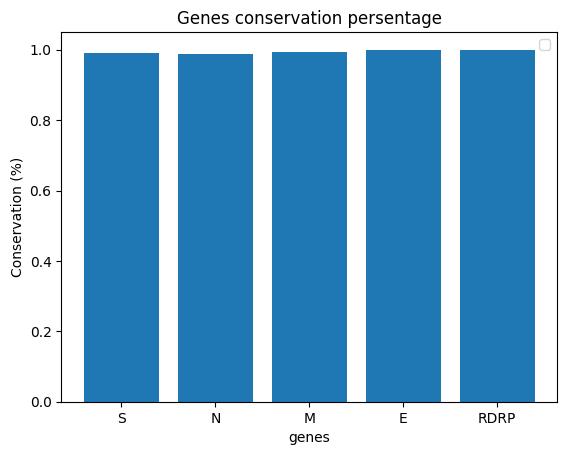

In [82]:
y1=[0.9916274201988488,0.9865079365079366,0.992526158445441,1.0,0.9989270386266095]
x1=["S","N","M","E","RDRP"]
plt.bar(x1, y1)
plt.plot()

plt.xlabel("genes")
plt.ylabel("Conservation (%)")
plt.title("Genes conservation persentage")
plt.legend()
plt.show()